# CS 282
### Programming Assignment 1
#### Item 5

Jan Lendl R. Uy

2019-00312

#### Sytem Specifications
- macOS Sequoia 15.0.1
- Macbook Air M1 (ARM), 8-Core CPU and 8-Core GPU

In [9]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
images_directory = "images"

In [3]:
def read_image(image_path):
    """
    Read image file regardless of format (including GIF)
    Returns grayscale numpy array
    """
    # Get file extension
    _, ext = os.path.splitext(image_path)
    ext = ext.lower()

    if ext in ['.gif', '.tif', '.tiff']:
        # Use PIL for GIF and TIFF files
        try:
            pil_img = Image.open(image_path)
            # Convert to grayscale
            if pil_img.mode != 'L':
                pil_img = pil_img.convert('L')
            # Convert to numpy array
            return np.array(pil_img)
        except Exception as e:
            print(f"Error reading image with PIL: {e}")
            return None
    else:
        # Use OpenCV for other formats
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        return img

In [4]:
def display_results(original, enhanced, title="Image Enhancement Results"):
    """
    Display original and enhanced images with histograms
    """
    fig = plt.figure(figsize=(15, 8))
    
    # Original image
    plt.subplot(231)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Original histogram
    plt.subplot(234)
    plt.hist(original.ravel(), 256, color='blue', alpha=0.7)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    
    # Enhanced image
    plt.subplot(232)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    
    # Enhanced histogram
    plt.subplot(235)
    plt.hist(enhanced.ravel(), 256, color='red', alpha=0.7)
    plt.title('Enhanced Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    
    # Difference image
    plt.subplot(233)
    diff = cv2.absdiff(enhanced, original)
    plt.imshow(diff, cmap='gray')
    plt.title('Difference Image')
    plt.axis('off')
    
    # Image statistics
    stats_text = f"Original - Mean: {np.mean(original):.1f}, Std: {np.std(original):.1f}\n"
    stats_text += f"Enhanced - Mean: {np.mean(enhanced):.1f}, Std: {np.std(enhanced):.1f}"
    plt.subplot(236)
    plt.text(0.1, 0.5, stats_text, wrap=True)
    plt.axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

## Dental Image


Processing images/dental.gif...


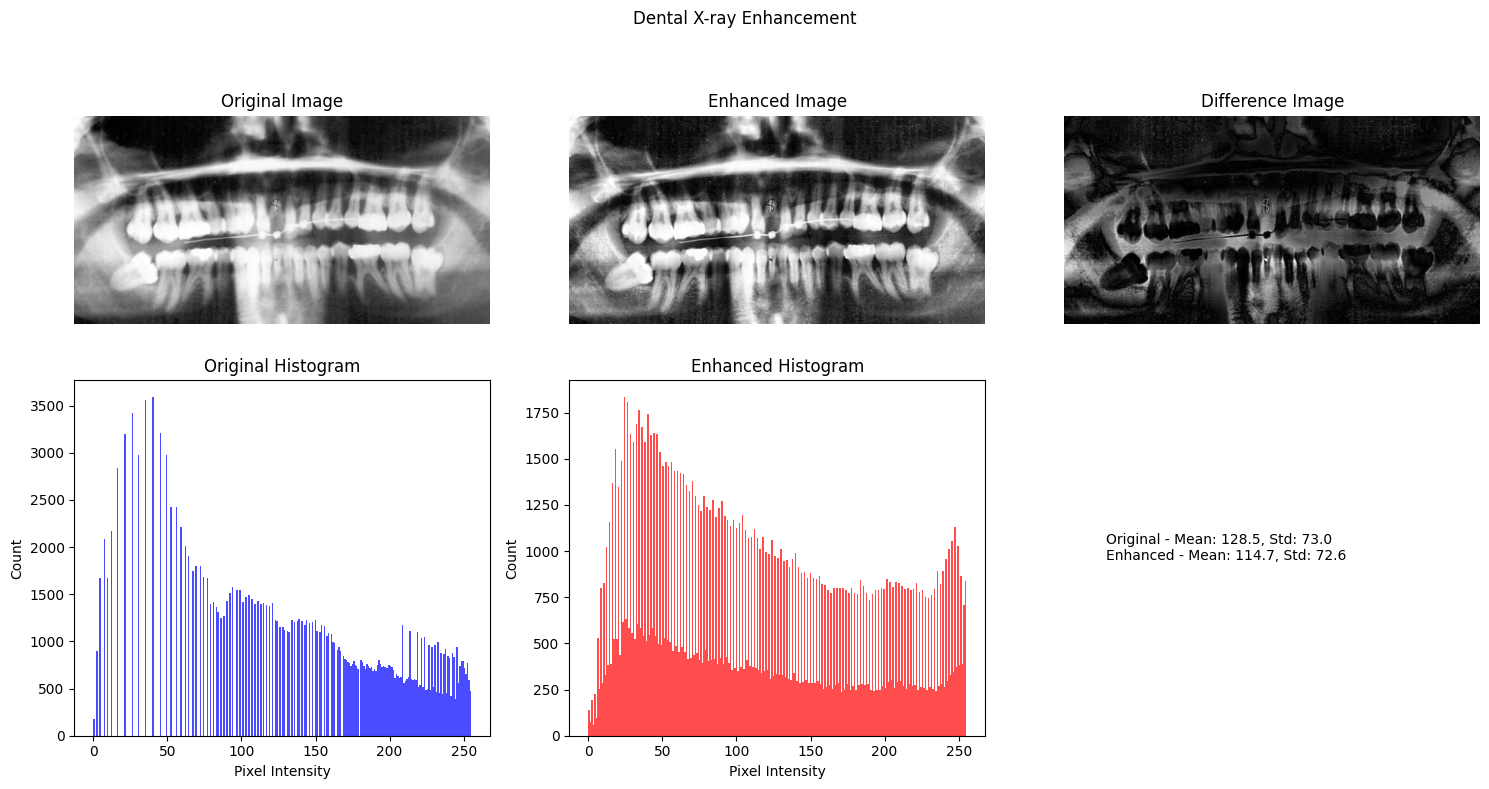

In [5]:
# Dental X-ray enhancement
dental_img_dir = f"{images_directory}/dental.gif"

print(f"\nProcessing {dental_img_dir}...")
dental_img = read_image(dental_img_dir)

# Apply CLAHE with specific parameters for X-ray
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
dental_enhanced = clahe.apply(dental_img)

# Apply unsharp masking
blur = cv2.GaussianBlur(dental_enhanced, (5,5), 2)
dental_enhanced = cv2.addWeighted(dental_enhanced, 1.5, blur, -0.5, 0)

# Final contrast adjustment
min_val = np.min(dental_enhanced)
max_val = np.max(dental_enhanced)
dental_enhanced = np.uint8(255 * ((dental_enhanced - min_val) / (max_val - min_val)))

display_results(dental_img, dental_enhanced, "Dental X-ray Enhancement")

## Cells Image

Processing images/cells27.jpg...


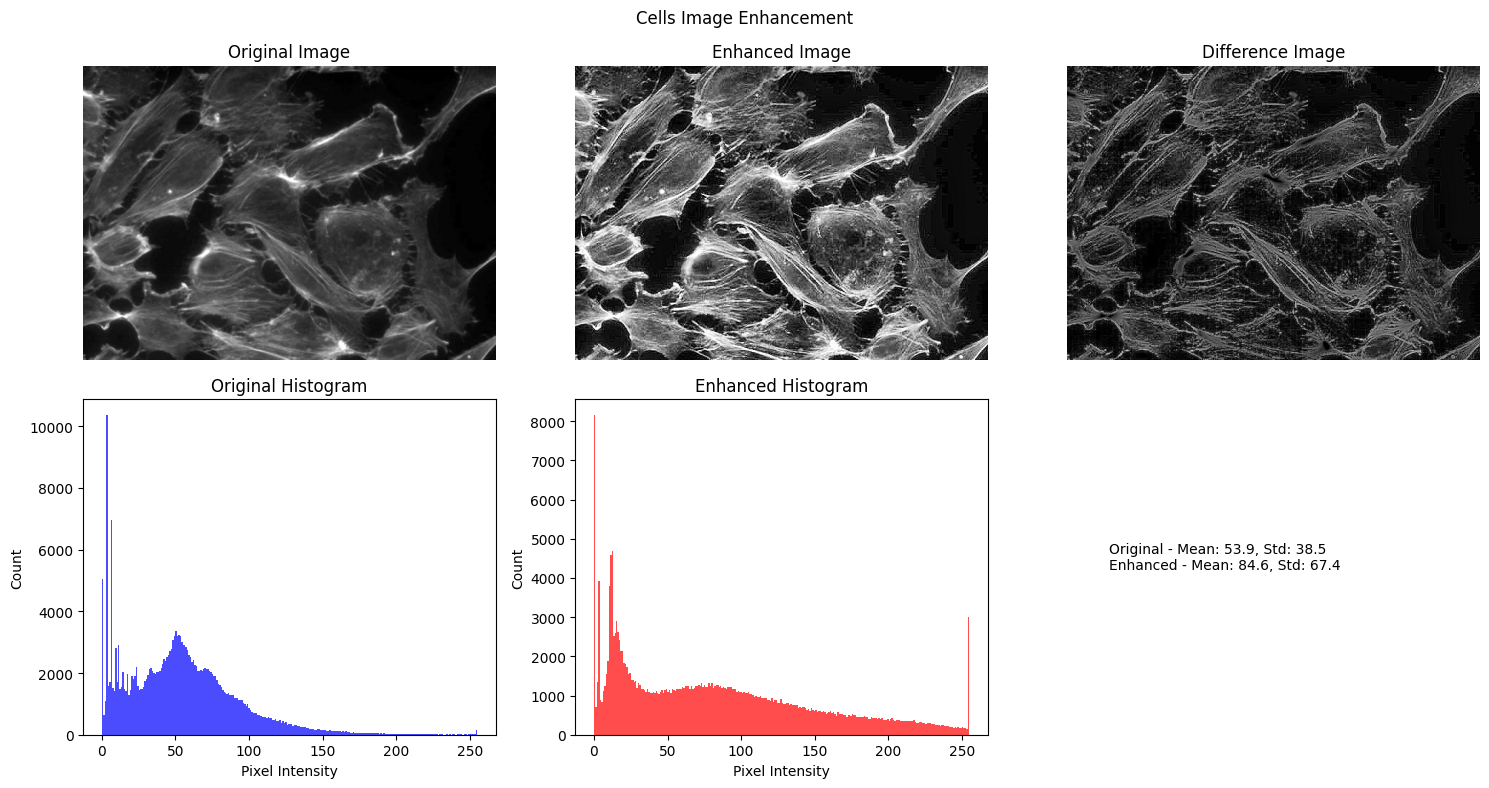

In [6]:
# Cell image enhancement
cells_img_dir = f"{images_directory}/cells27.jpg"

print(f"Processing {cells_img_dir}...")
cells_img = read_image(cells_img_dir)

# Apply CLAHE for better cell visibility
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cells_enhanced = clahe.apply(cells_img)

# Apply Laplacian sharpening
kernel = np.array([[0, 1, 0],
                [1, -4, 1],
                [0, 1, 0]], dtype=np.float32)
cells_laplacian = cv2.filter2D(cells_enhanced, cv2.CV_64F, kernel)
cells_enhanced = np.uint8(np.clip(cells_enhanced - cells_laplacian, 0, 255))

display_results(cells_img, cells_enhanced, "Cells Image Enhancement")

## Butterfly Image


Processing images/butterfly.gif...


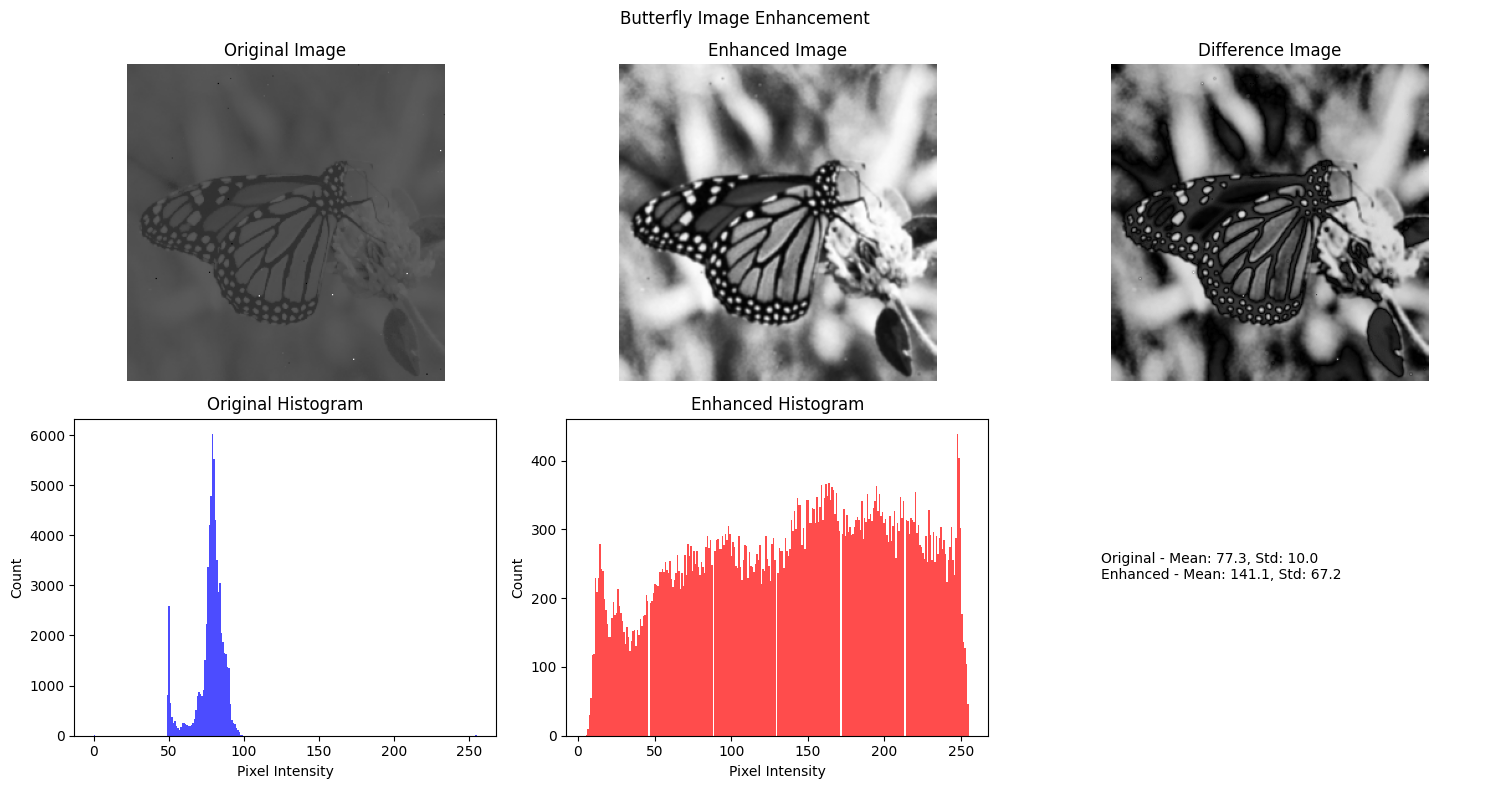

In [7]:
# Butterfly image enhancement
butterfly_img_dir = f"{images_directory}/butterfly.gif"

print(f"\nProcessing {butterfly_img_dir}...")
butterfly_img = read_image(butterfly_img_dir)

butterfly_enhanced = cv2.equalizeHist(butterfly_img)

# Apply CLAHE for more options for enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
butterfly_enhanced = clahe.apply(butterfly_enhanced)

# Apply light Gaussian blur to reduce any noise enhanced by equalization
butterfly_enhanced = cv2.GaussianBlur(butterfly_enhanced, (3,3), 0)

display_results(butterfly_img, butterfly_enhanced, "Butterfly Image Enhancement")

## Mom and Kids Image


Processing images/momandkids.jpg...


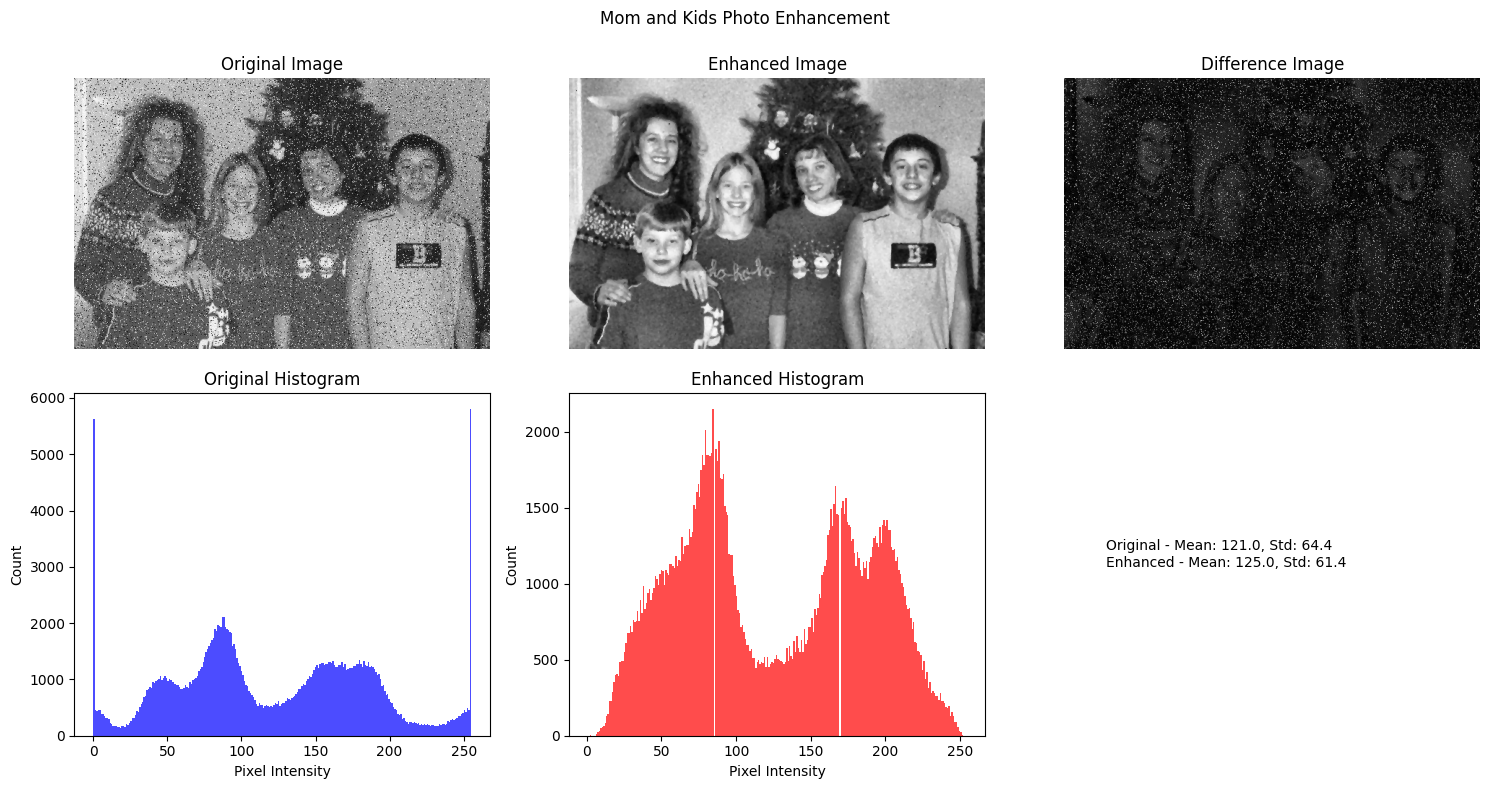

In [8]:
# Mom and kids photo enhancement
momandkids_img_dir = f"{images_directory}/momandkids.jpg"

print(f"\nProcessing {momandkids_img_dir}...")
momkids_img = read_image(momandkids_img_dir)

# Remove salt-and-pepper noise with smaller median filter
momkids_enhanced = cv2.medianBlur(momkids_img, 3)

# Apply less aggressive bilateral filter
momkids_enhanced = cv2.bilateralFilter(momkids_enhanced, 1, 10, 10)

# Apply unsharp masking to restore sharpness
gaussian_blur = cv2.GaussianBlur(momkids_enhanced, (3, 3), 0.5)
unsharp_mask = cv2.addWeighted(momkids_enhanced, 1.5, gaussian_blur, -0.5, 0)
momkids_enhanced = cv2.addWeighted(momkids_enhanced, 0.7, unsharp_mask, 0.3, 0)

# Apply conservative CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
momkids_enhanced = clahe.apply(momkids_enhanced)

display_results(momkids_img, momkids_enhanced, "Mom and Kids Photo Enhancement")